In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/niran/OneDrive/Desktop/Projects/DoorDash Project/historical_data.csv")

In [4]:
df.head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
df.nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
dtype: int64

In [6]:
df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [7]:
# Fill NA values for store IDs with a single cuisine
def fill_single_cuisine(df):
    filled_df = df.copy()
    # Fill NA values using forward fill and backward fill within each store_id group
    filled_df['store_primary_category'] = filled_df.groupby('store_id')['store_primary_category'].transform(lambda x: x.ffill().bfill())
    return filled_df

df_filled_single = fill_single_cuisine(df)

# Identify store IDs with multiple cuisines
multiple_cuisines = df_filled_single.groupby('store_id')['store_primary_category'].nunique()
multiple_cuisines = multiple_cuisines[multiple_cuisines > 1].index

# Function to fill NA values for store IDs with multiple cuisines
def fill_multiple_cuisines(df, store_ids):
    df_multi = df.copy()
    for store_id in store_ids:
        cuisines = df_multi[df_multi['store_id'] == store_id]['store_primary_category'].dropna().unique()
        na_indices = df_multi[(df_multi['store_id'] == store_id) & (df_multi['store_primary_category'].isna())].index
        # Assign cuisines proportionally or randomly
        assigned_cuisines = np.random.choice(cuisines, size=len(na_indices))
        df_multi.loc[na_indices, 'store_primary_category'] = assigned_cuisines
    return df_multi

# Fill NA values for store IDs with multiple cuisines
df_filled_multiple = fill_multiple_cuisines(df_filled_single, multiple_cuisines)

print("Original DataFrame:")
print(df)
print("\nFilled DataFrame:")
print(df_filled_multiple)

Original DataFrame:
        market_id           created_at actual_delivery_time  store_id  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2             3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3             3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4             3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   
...           ...                  ...                  ...       ...   
197423        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48      2956   
197424        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22      2956   
197425        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16      2956   
197426        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22      3630   
197427        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41      3630   

       store_primary_category  order_protocol  total_items  subtotal  \
0                    american  

In [8]:
df_filled_multiple.head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,mexican,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,mexican,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,mexican,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,mexican,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,indian,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [9]:
df_filled_multiple.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                            867
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [10]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [11]:
df.shape

(197428, 16)

In [12]:
def most_common(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return mode_val[0]
    else:
        return None

# Get the most common order_protocol for each store_id
most_common_protocol = df_filled_multiple.groupby('store_id')['order_protocol'].transform(most_common)

# Fill NA values with the most common order_protocol for each store_id
df_filled_multiple['order_protocol'] = df_filled_multiple['order_protocol'].fillna(most_common_protocol)

print(df_filled_multiple)

        market_id           created_at actual_delivery_time  store_id  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2             3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3             3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4             3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   
...           ...                  ...                  ...       ...   
197423        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48      2956   
197424        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22      2956   
197425        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16      2956   
197426        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22      3630   
197427        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41      3630   

       store_primary_category  order_protocol  total_items  subtotal  \
0                    american             1.0      

In [13]:
df_filled_multiple.head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,mexican,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,mexican,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,mexican,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,mexican,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,indian,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [14]:
df_filled_multiple.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                            867
order_protocol                                      3
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [15]:
df_v1 = df_filled_multiple.copy()

In [16]:
df.iloc[30:40]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
30,1.0,2015-01-30 01:43:09,2015-01-30 02:20:42,5058,italian,1.0,2,2700,2,1200,1500,16.0,16.0,13.0,446,456.0
31,3.0,2015-01-30 19:49:30,2015-01-30 20:28:45,4149,sandwich,2.0,4,3490,3,175,850,16.0,16.0,21.0,251,298.0
32,1.0,2015-01-28 20:33:04,2015-01-28 21:04:14,4149,NaN,NaN,3,1765,3,275,895,22.0,21.0,24.0,251,490.0
33,1.0,2015-02-12 20:27:42,2015-02-12 21:18:29,4149,NaN,2.0,1,975,1,975,975,24.0,25.0,30.0,251,487.0
34,1.0,2015-01-28 21:37:38,2015-01-28 22:11:53,4149,NaN,2.0,3,1425,3,175,900,13.0,12.0,7.0,251,704.0
35,2.0,2015-02-09 20:29:30,2015-02-09 21:17:34,4149,thai,5.0,1,1220,1,825,825,21.0,21.0,20.0,251,835.0
36,1.0,2015-01-21 20:35:27,2015-01-21 21:01:26,4149,NaN,2.0,2,1750,2,825,825,18.0,18.0,20.0,251,259.0
37,1.0,2015-02-16 19:19:17,2015-02-16 20:16:43,4149,NaN,2.0,8,7870,6,825,895,12.0,11.0,9.0,251,98.0
38,1.0,2015-01-27 20:26:19,2015-01-27 21:03:53,4149,NaN,2.0,2,1725,2,825,900,21.0,18.0,18.0,251,294.0
39,1.0,2015-01-22 20:19:08,2015-01-22 21:07:43,4149,NaN,2.0,3,2015,3,395,1025,22.0,13.0,13.0,251,740.0


In [17]:
df_v1.iloc[30:40]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
30,1.0,2015-01-30 01:43:09,2015-01-30 02:20:42,5058,italian,1.0,2,2700,2,1200,1500,16.0,16.0,13.0,446,456.0
31,3.0,2015-01-30 19:49:30,2015-01-30 20:28:45,4149,sandwich,2.0,4,3490,3,175,850,16.0,16.0,21.0,251,298.0
32,1.0,2015-01-28 20:33:04,2015-01-28 21:04:14,4149,sandwich,2.0,3,1765,3,275,895,22.0,21.0,24.0,251,490.0
33,1.0,2015-02-12 20:27:42,2015-02-12 21:18:29,4149,sandwich,2.0,1,975,1,975,975,24.0,25.0,30.0,251,487.0
34,1.0,2015-01-28 21:37:38,2015-01-28 22:11:53,4149,sandwich,2.0,3,1425,3,175,900,13.0,12.0,7.0,251,704.0
35,2.0,2015-02-09 20:29:30,2015-02-09 21:17:34,4149,thai,5.0,1,1220,1,825,825,21.0,21.0,20.0,251,835.0
36,1.0,2015-01-21 20:35:27,2015-01-21 21:01:26,4149,thai,2.0,2,1750,2,825,825,18.0,18.0,20.0,251,259.0
37,1.0,2015-02-16 19:19:17,2015-02-16 20:16:43,4149,thai,2.0,8,7870,6,825,895,12.0,11.0,9.0,251,98.0
38,1.0,2015-01-27 20:26:19,2015-01-27 21:03:53,4149,thai,2.0,2,1725,2,825,900,21.0,18.0,18.0,251,294.0
39,1.0,2015-01-22 20:19:08,2015-01-22 21:07:43,4149,thai,2.0,3,2015,3,395,1025,22.0,13.0,13.0,251,740.0


In [18]:
df_v1[df_v1['store_primary_category'].isnull()].head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
318,3.0,2015-01-23 19:22:18,2015-01-23 19:48:50,3879,NaN,4.0,3,582,1,194,194,6.0,5.0,4.0,251,245.0
319,3.0,2015-02-01 17:26:45,2015-02-01 18:24:13,3879,NaN,4.0,5,980,2,194,199,1.0,1.0,3.0,251,344.0
1283,3.0,2015-02-07 03:02:56,2015-02-07 03:55:30,3469,NaN,4.0,4,1246,2,194,429,8.0,8.0,11.0,251,182.0
1598,3.0,2015-02-02 00:34:04,2015-02-02 01:21:03,5550,NaN,1.0,1,1799,1,1799,1799,9.0,10.0,10.0,446,697.0
1599,3.0,2015-02-13 21:05:28,2015-02-13 21:36:56,5550,NaN,1.0,1,999,1,999,999,7.0,6.0,8.0,446,834.0
1600,3.0,2015-01-28 00:01:47,2015-01-28 00:23:41,5550,NaN,1.0,2,1749,2,750,999,6.0,3.0,3.0,446,423.0
1601,3.0,2015-01-24 02:56:27,2015-01-24 03:36:33,5550,NaN,1.0,6,3099,4,200,999,21.0,14.0,14.0,446,345.0
1602,3.0,2015-02-08 00:21:41,2015-02-08 00:52:10,5550,NaN,1.0,1,999,1,999,999,7.0,1.0,0.0,446,835.0
1603,3.0,2015-02-13 03:34:13,2015-02-13 05:10:30,5550,NaN,1.0,4,3600,3,650,1150,11.0,7.0,7.0,446,807.0
1604,3.0,2015-02-06 03:55:28,2015-02-06 04:30:24,5550,NaN,1.0,3,3648,2,1199,1250,10.0,6.0,6.0,446,373.0


In [19]:
# Step 1: Drop rows with NaN values and save the new DataFrame as 'df_v2'
df_v2 = df_v1.dropna()

# Step 2: Calculate the percentage of rows dropped
rows_dropped = len(df_v1) - len(df_v2)
percentage_dropped = (rows_dropped / len(df_v1)) * 100

# Output the percentage of rows dropped
percentage_dropped

9.335555240391434

In [20]:
df_v2.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [21]:
df_v2.head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,mexican,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,mexican,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,mexican,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,mexican,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,indian,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [22]:
df_v2.shape

(178997, 16)

In [23]:
df_v1[df_v1['market_id'].isnull()].head(15)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
45,NaN,2015-02-09 03:27:37,2015-02-09 04:22:18,5054,italian,1.0,2,2400,2,600,1800,94.0,92.0,149.0,446,287.0
182,NaN,2015-02-01 05:32:34,2015-02-01 06:01:21,5081,mediterranean,3.0,2,1845,2,600,1245,33.0,23.0,30.0,251,581.0
970,NaN,2015-02-17 02:17:43,2015-02-17 03:15:14,1148,indian,3.0,3,3400,3,1000,1200,36.0,36.0,52.0,251,653.0
1126,NaN,2015-02-18 03:50:52,2015-02-18 04:15:09,1904,sandwich,2.0,1,1395,1,795,795,89.0,71.0,72.0,251,315.0
1625,NaN,2015-02-17 03:49:46,2015-02-17 04:21:27,283,pizza,3.0,1,1699,1,1399,1399,44.0,40.0,69.0,251,597.0
1921,NaN,2015-02-07 02:11:12,2015-02-07 03:10:11,1027,chinese,2.0,5,5240,5,595,1325,47.0,40.0,71.0,251,595.0
1964,NaN,2015-01-23 04:09:03,2015-01-23 05:14:00,238,vietnamese,1.0,2,2240,1,920,920,NaN,NaN,NaN,446,504.0
2104,NaN,2015-02-01 01:24:40,2015-02-01 02:14:33,2938,pizza,1.0,2,3070,1,735,735,20.0,21.0,13.0,446,203.0
2258,NaN,2015-01-31 21:56:35,2015-01-31 22:38:40,5589,other,1.0,3,2350,3,450,1275,13.0,12.0,12.0,446,634.0
2351,NaN,2015-01-29 02:46:37,2015-01-29 03:47:41,59,chinese,1.0,2,890,2,160,710,0.0,0.0,0.0,446,354.0


In [24]:
df_v1_original = df_v1.copy()

# Function to get the most frequent value in a series
def most_frequent(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Group by store_id and fill market_id with the most frequent value
df_v1_original['market_id'] = df_v1_original.groupby('store_id')['market_id'].transform(lambda x: most_frequent(x))

# Save the transformed DataFrame as df_v3
df_v3 = df_v1_original.copy()


In [25]:
df_v3.isnull().sum()

market_id                                           3
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                            867
order_protocol                                      3
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [26]:
df_v1.iloc[40:50]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
40,1.0,2015-02-10 20:05:17,2015-02-10 20:34:43,4149,thai,2.0,1,1220,1,825,825,21.0,21.0,20.0,251,835.0
41,1.0,2015-01-27 18:32:58,2015-01-27 19:02:09,3201,cafe,4.0,2,595,2,200,295,5.0,1.0,1.0,251,186.0
42,4.0,2015-02-07 01:36:34,2015-02-07 02:46:27,5054,italian,1.0,4,5500,4,700,1900,117.0,112.0,178.0,446,588.0
43,4.0,2015-02-14 03:04:07,2015-02-14 04:25:25,5054,italian,1.0,5,5400,3,600,2200,130.0,129.0,230.0,446,795.0
44,4.0,2015-02-08 02:50:54,2015-02-08 04:03:49,5054,italian,1.0,4,7104,3,751,2191,121.0,119.0,205.0,446,530.0
45,NaN,2015-02-09 03:27:37,2015-02-09 04:22:18,5054,italian,1.0,2,2400,2,600,1800,94.0,92.0,149.0,446,287.0
46,3.0,2015-02-12 03:12:08,2015-02-12 03:44:48,2004,american,5.0,5,6200,5,500,1800,34.0,30.0,28.0,251,86.0
47,3.0,2015-02-18 04:26:00,2015-02-18 05:05:00,2004,american,5.0,2,2800,2,1000,1800,18.0,15.0,15.0,251,821.0
48,3.0,2015-02-15 04:09:59,2015-02-15 04:50:02,2004,american,5.0,4,5800,4,600,2400,33.0,33.0,42.0,251,179.0
49,3.0,2015-02-17 21:34:38,2015-02-17 22:04:26,2004,american,5.0,2,2641,2,625,1240,27.0,22.0,24.0,251,89.0


In [27]:
df_v3.iloc[40:50]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
40,1.0,2015-02-10 20:05:17,2015-02-10 20:34:43,4149,thai,2.0,1,1220,1,825,825,21.0,21.0,20.0,251,835.0
41,1.0,2015-01-27 18:32:58,2015-01-27 19:02:09,3201,cafe,4.0,2,595,2,200,295,5.0,1.0,1.0,251,186.0
42,4.0,2015-02-07 01:36:34,2015-02-07 02:46:27,5054,italian,1.0,4,5500,4,700,1900,117.0,112.0,178.0,446,588.0
43,4.0,2015-02-14 03:04:07,2015-02-14 04:25:25,5054,italian,1.0,5,5400,3,600,2200,130.0,129.0,230.0,446,795.0
44,4.0,2015-02-08 02:50:54,2015-02-08 04:03:49,5054,italian,1.0,4,7104,3,751,2191,121.0,119.0,205.0,446,530.0
45,4.0,2015-02-09 03:27:37,2015-02-09 04:22:18,5054,italian,1.0,2,2400,2,600,1800,94.0,92.0,149.0,446,287.0
46,3.0,2015-02-12 03:12:08,2015-02-12 03:44:48,2004,american,5.0,5,6200,5,500,1800,34.0,30.0,28.0,251,86.0
47,3.0,2015-02-18 04:26:00,2015-02-18 05:05:00,2004,american,5.0,2,2800,2,1000,1800,18.0,15.0,15.0,251,821.0
48,3.0,2015-02-15 04:09:59,2015-02-15 04:50:02,2004,american,5.0,4,5800,4,600,2400,33.0,33.0,42.0,251,179.0
49,3.0,2015-02-17 21:34:38,2015-02-17 22:04:26,2004,american,5.0,2,2641,2,625,1240,27.0,22.0,24.0,251,89.0


In [28]:
# Step 1: Drop rows with NaN values and save the new DataFrame as 'df_v2'
df_v4 = df_v3.dropna()

# Step 2: Calculate the percentage of rows dropped
rows_dropped = len(df_v3) - len(df_v4)
percentage_dropped = (rows_dropped / len(df_v3)) * 100

# Output the percentage of rows dropped
percentage_dropped

8.871588629778957

In [29]:
df_v4.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [30]:
def plot_box_whisker_grid(data, features, n_rows=4, n_cols=2):
    """
    Plot box and whisker plots for specified features in a grid.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of column names to plot.
    - n_rows: number of rows in the grid.
    - n_cols: number of columns in the grid.
    """
    num_features = len(features)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < num_features:
            sns.boxplot(y=data[feature], ax=axes[i])
            axes[i].set_title(f'Box plot of {feature}')
        else:
            axes[i].axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

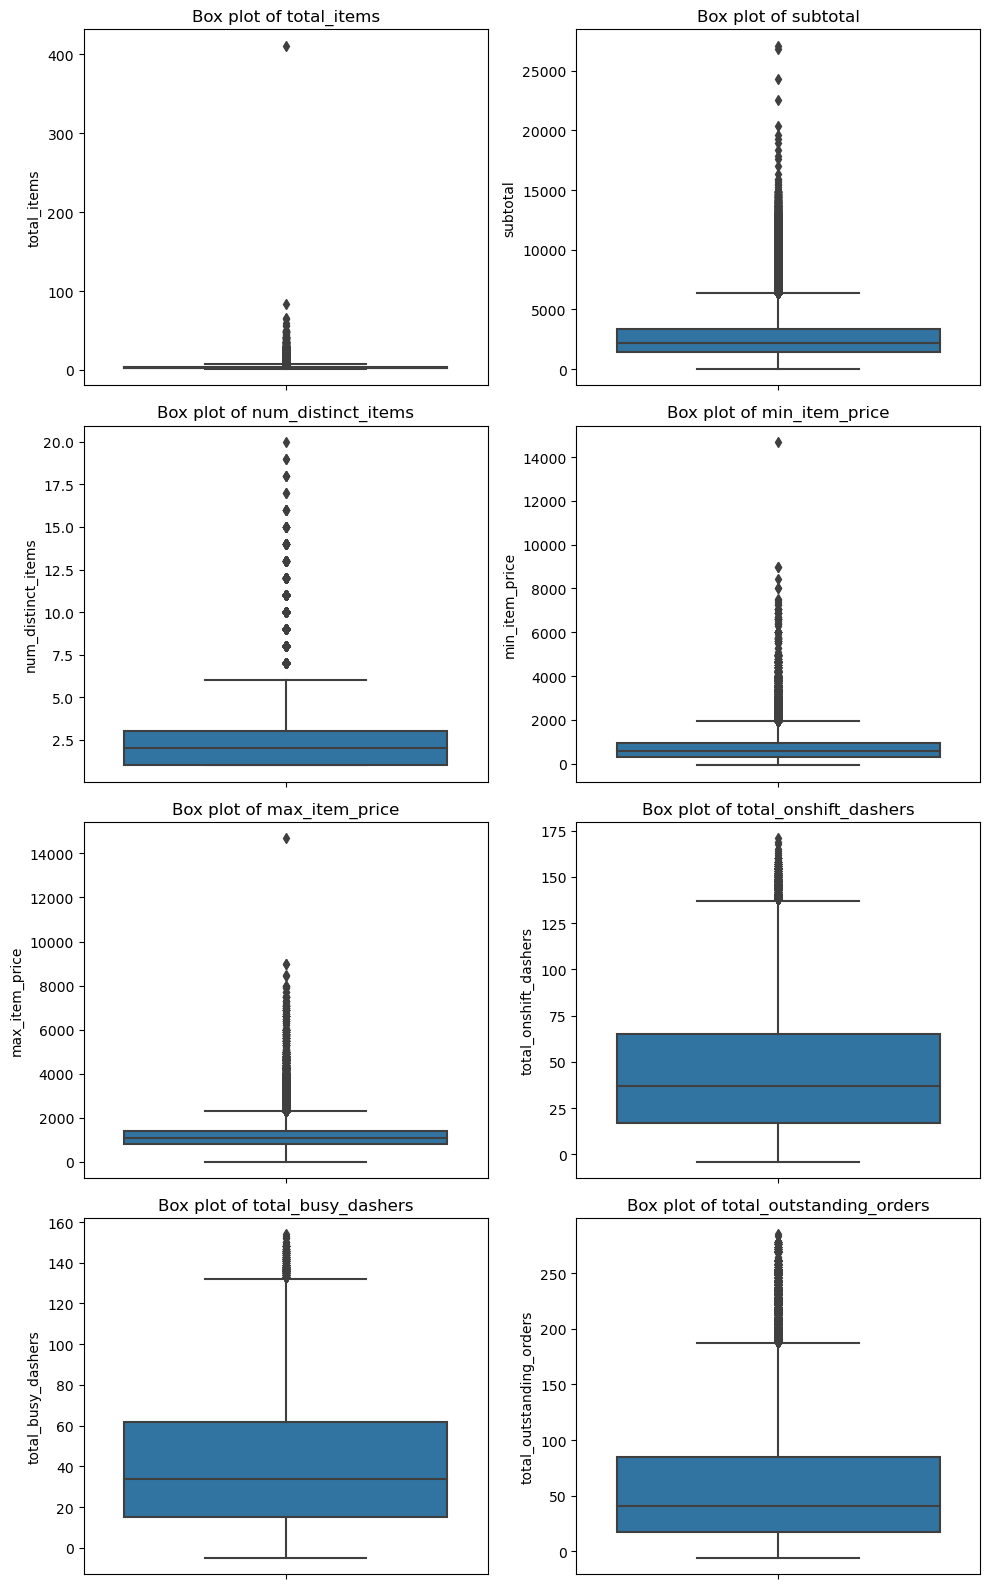

In [40]:
plot_box_whisker_grid(df, ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'])

In [32]:
df_v4.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,3.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,mexican,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [33]:
def calculate_outlier_percentage(data, features):
    """
    Calculate the percentage of outliers for each feature in the dataset.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of column names to calculate outliers for.

    Returns:
    - outlier_percentages: dictionary with feature names as keys and outlier percentages as values.
    """
    outlier_percentages = {}
    
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_percentage = len(outliers) / len(data) * 100
        outlier_percentages[feature] = outlier_percentage
    
    return outlier_percentages

In [34]:
features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']
outlier_percentages = calculate_outlier_percentage(df_v4, features)

# Print outlier percentages
for feature, percentage in outlier_percentages.items():
    print(f'{feature}: {percentage:.2f}% outliers')

total_items: 4.84% outliers
subtotal: 4.65% outliers
num_distinct_items: 11.89% outliers
min_item_price: 2.32% outliers
max_item_price: 3.96% outliers
total_onshift_dashers: 0.83% outliers
total_busy_dashers: 0.34% outliers
total_outstanding_orders: 2.94% outliers


In [35]:
def remove_outliers(data, features):
    """
    Remove rows with outliers for specified features in the dataset.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of column names to remove outliers from.

    Returns:
    - cleaned_data: DataFrame with outliers removed.
    """
    cleaned_data = data.copy()
    
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]
    
    return cleaned_data

In [36]:
features_to_clean = ['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']


In [38]:
# Remove outliers
df_cleaned = remove_outliers(df_v4, features_to_clean)

df_v5 = df_cleaned.copy()

In [39]:
outlier_percentages = calculate_outlier_percentage(df_v5, features)

for feature, percentage in outlier_percentages.items():
    print(f'{feature}: {percentage:.2f}% outliers')

total_items: 0.00% outliers
subtotal: 1.78% outliers
num_distinct_items: 0.41% outliers
min_item_price: 0.50% outliers
max_item_price: 0.90% outliers
total_onshift_dashers: 0.67% outliers
total_busy_dashers: 0.16% outliers
total_outstanding_orders: 1.70% outliers


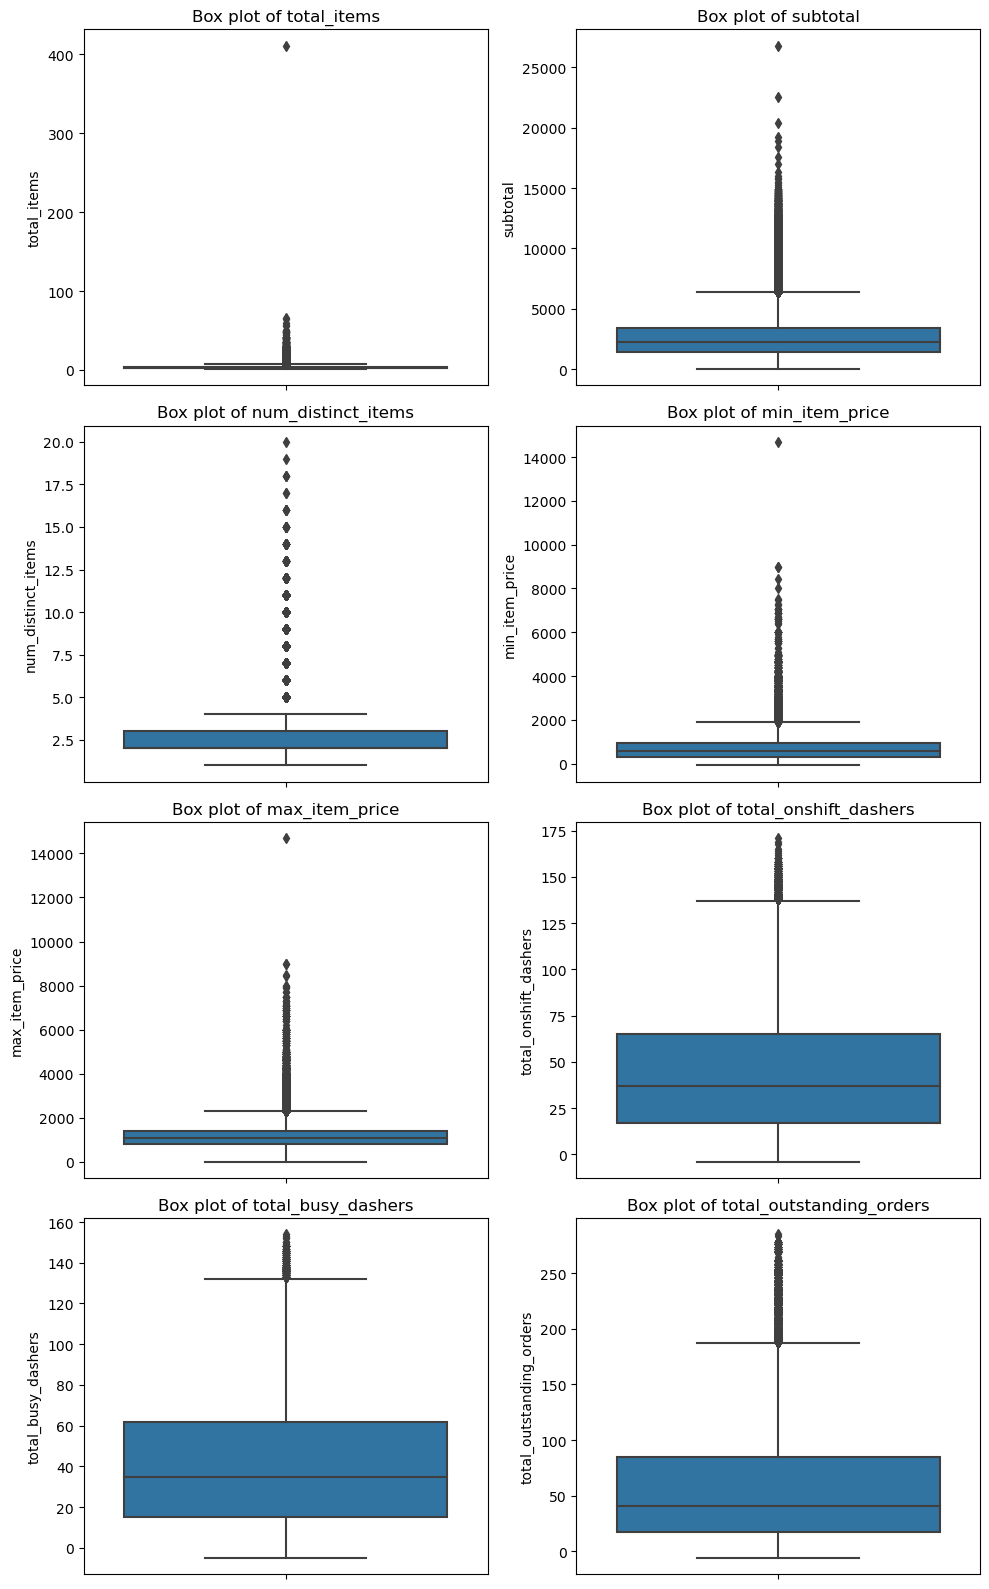

In [41]:
plot_box_whisker_grid(df_v4, ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'])

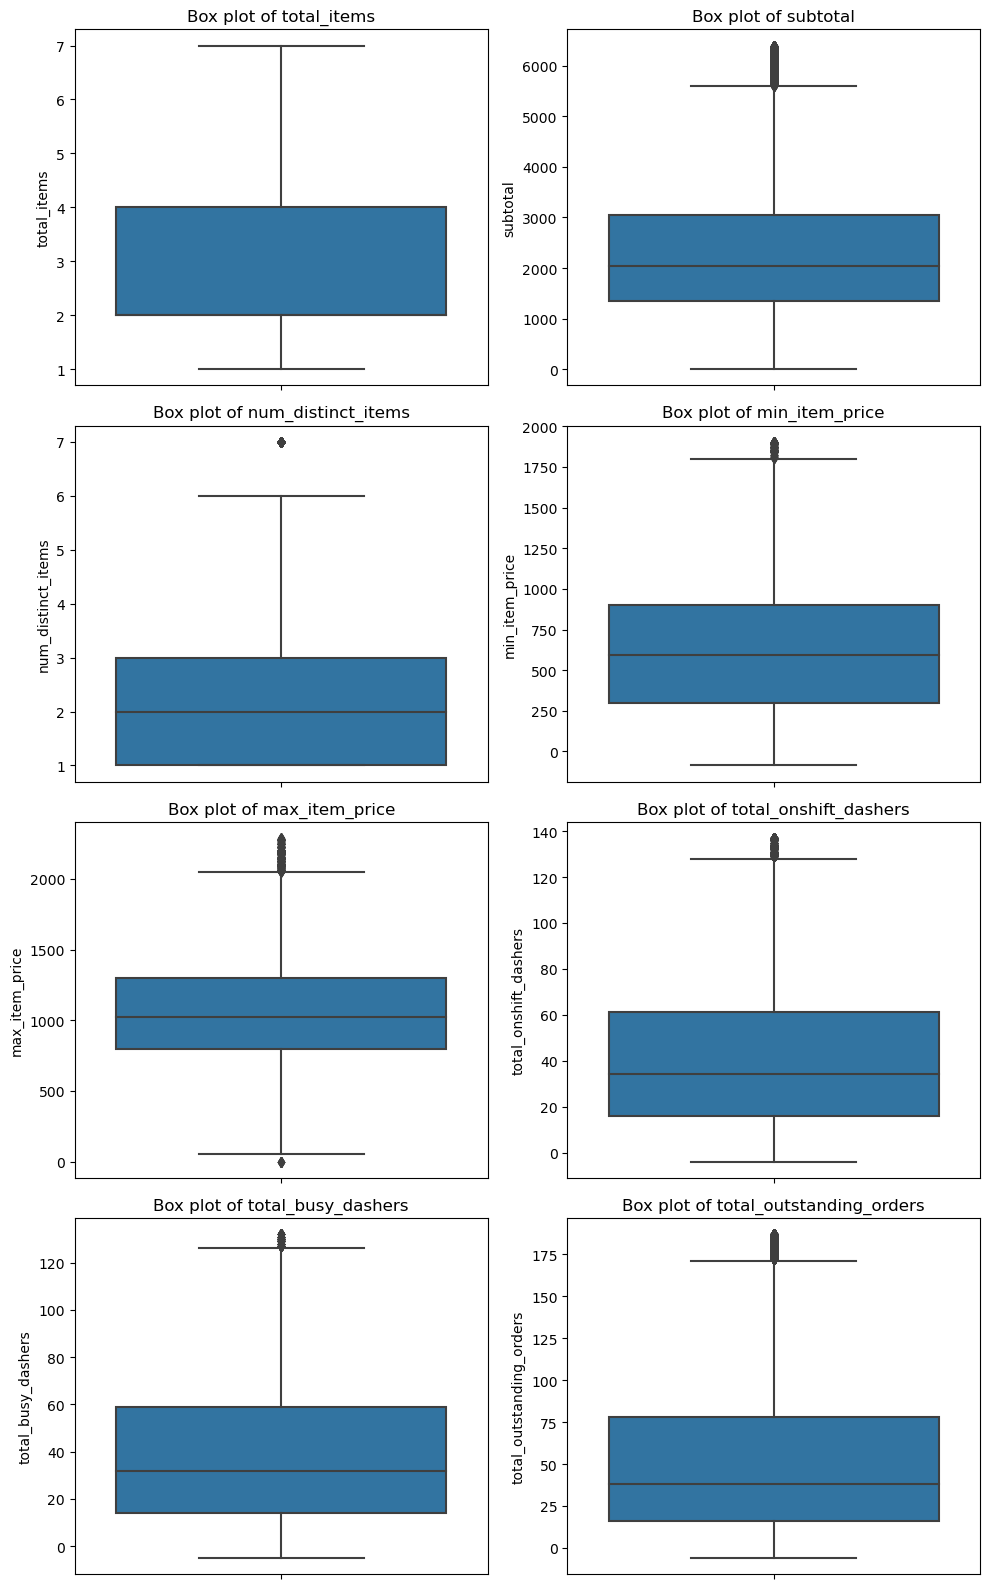

In [42]:
plot_box_whisker_grid(df_v5, ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'])

In [44]:
df_v5.shape

(154298, 16)

In [46]:
# Ensure the columns are in datetime format
df_v5['created_at'] = pd.to_datetime(df_v5['created_at'])
df_v5['actual_delivery_time'] = pd.to_datetime(df_v5['actual_delivery_time'])

# Calculate the time difference in seconds
df_v5['delivery_duration_seconds'] = (df_v5['actual_delivery_time'] - df_v5['created_at']).dt.total_seconds()

# Save the transformed DataFrame as a new version
df_v6 = df_v5.copy()

# Display the first few rows to verify
df_v6.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration_seconds
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,3.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,mexican,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,mexican,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,mexican,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0,2300.0


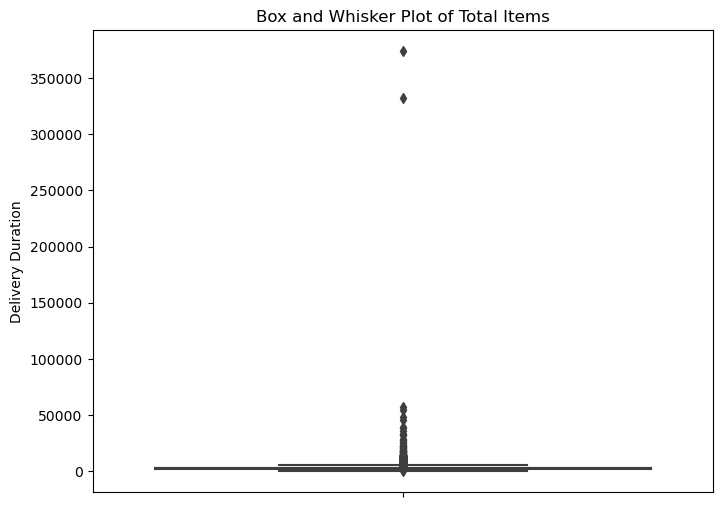

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_v6['delivery_duration_seconds'])
plt.title('Box and Whisker Plot of Total Items')
plt.ylabel('Delivery Duration')

# Display the plot
plt.show()

In [50]:
df_v6.shape

(154298, 17)

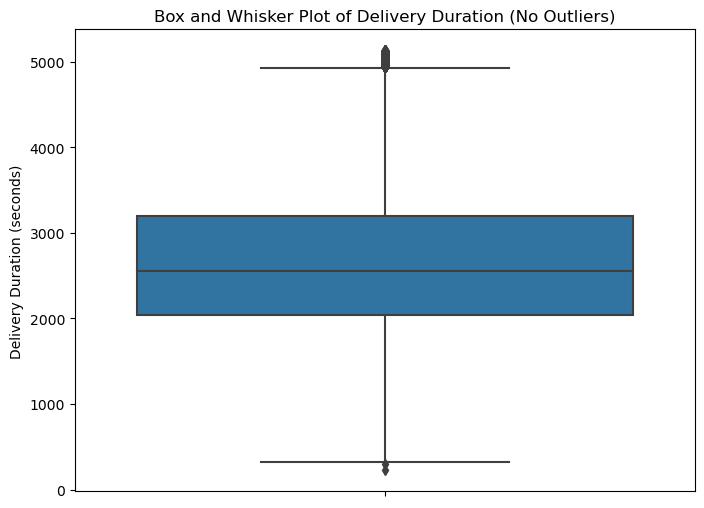

In [51]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_v6['delivery_duration_seconds'].quantile(0.25)
Q3 = df_v6['delivery_duration_seconds'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_v6_no_outliers = df_v6[(df_v6['delivery_duration_seconds'] >= lower_bound) & 
                          (df_v6['delivery_duration_seconds'] <= upper_bound)]

# Create the box and whisker plot without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_v6_no_outliers['delivery_duration_seconds'])
plt.title('Box and Whisker Plot of Delivery Duration (No Outliers)')
plt.ylabel('Delivery Duration (seconds)')

# Display the plot
plt.show()

In [52]:
df_v6_no_outliers.shape

(149125, 17)

In [53]:
df_v7 = df_v6_no_outliers.copy()

In [55]:
df_v7.to_csv(r"C:\Users\niran\OneDrive\Desktop\Projects\DoorDash Project\final_data.csv", index=False)